In [2]:
#Setup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
## Import Keras objects for Deep Learning
from tensorflow import keras
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [2]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('data/diabetes.csv', names=names, header=0)

In [3]:
diabetes_df

times_pregnant  glucose_tolerance_test  blood_pressure  skin_thickness  \
0                 6                     148              72              35   
1                 1                      85              66              29   
2                 8                     183              64               0   
3                 1                      89              66              23   
4                 0                     137              40              35   
..              ...                     ...             ...             ...   
763              10                     101              76              48   
764               2                     122              70              27   
765               5                     121              72              23   
766               1                     126              60               0   
767               1                      93              70              31   

     insulin   bmi  pedigree_function  age  has_diabetes  
0          0  33.6              0.627   50             1  
1          0  26.6              0.351   31             0  
2          0  23.3              0.672   32             1  
3         94  28.1              0.167   21             0  
4        168  43.1              2.288   33             1  
..       ...   ...                ...  ...           ...  
763      180  32.9              0.171   63             0  
764        0  36.8              0.340   27             0  
765      112  26.2              0.245   30             0  
766        0  30.1              0.349   47             1  
767        0  30.4              0.315   23             0  

[768 rows x 9 columns]

In [43]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values
X = StandardScaler().fit(X).transform(X)

# Split the data to Train, and Test (75%, 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [44]:
### BEGIN SOLUTION
## Train the RF Model with a Linear Discriminant Analysis
rf_model = LinearDiscriminantAnalysis()
rf_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [45]:
## Predict test input's class.
print(rf_model.predict(X_test))

[0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 1 1 0]


In [46]:
## Correct Answer.
print(y_test)

[0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 1 1 0]


In [47]:
## Compute Accuracy for sklearn LDA.
np.sum(np.logical_not(np.logical_xor(rf_model.predict(X_test),y_test)))/(y_test.size)

0.7708333333333334

In [48]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


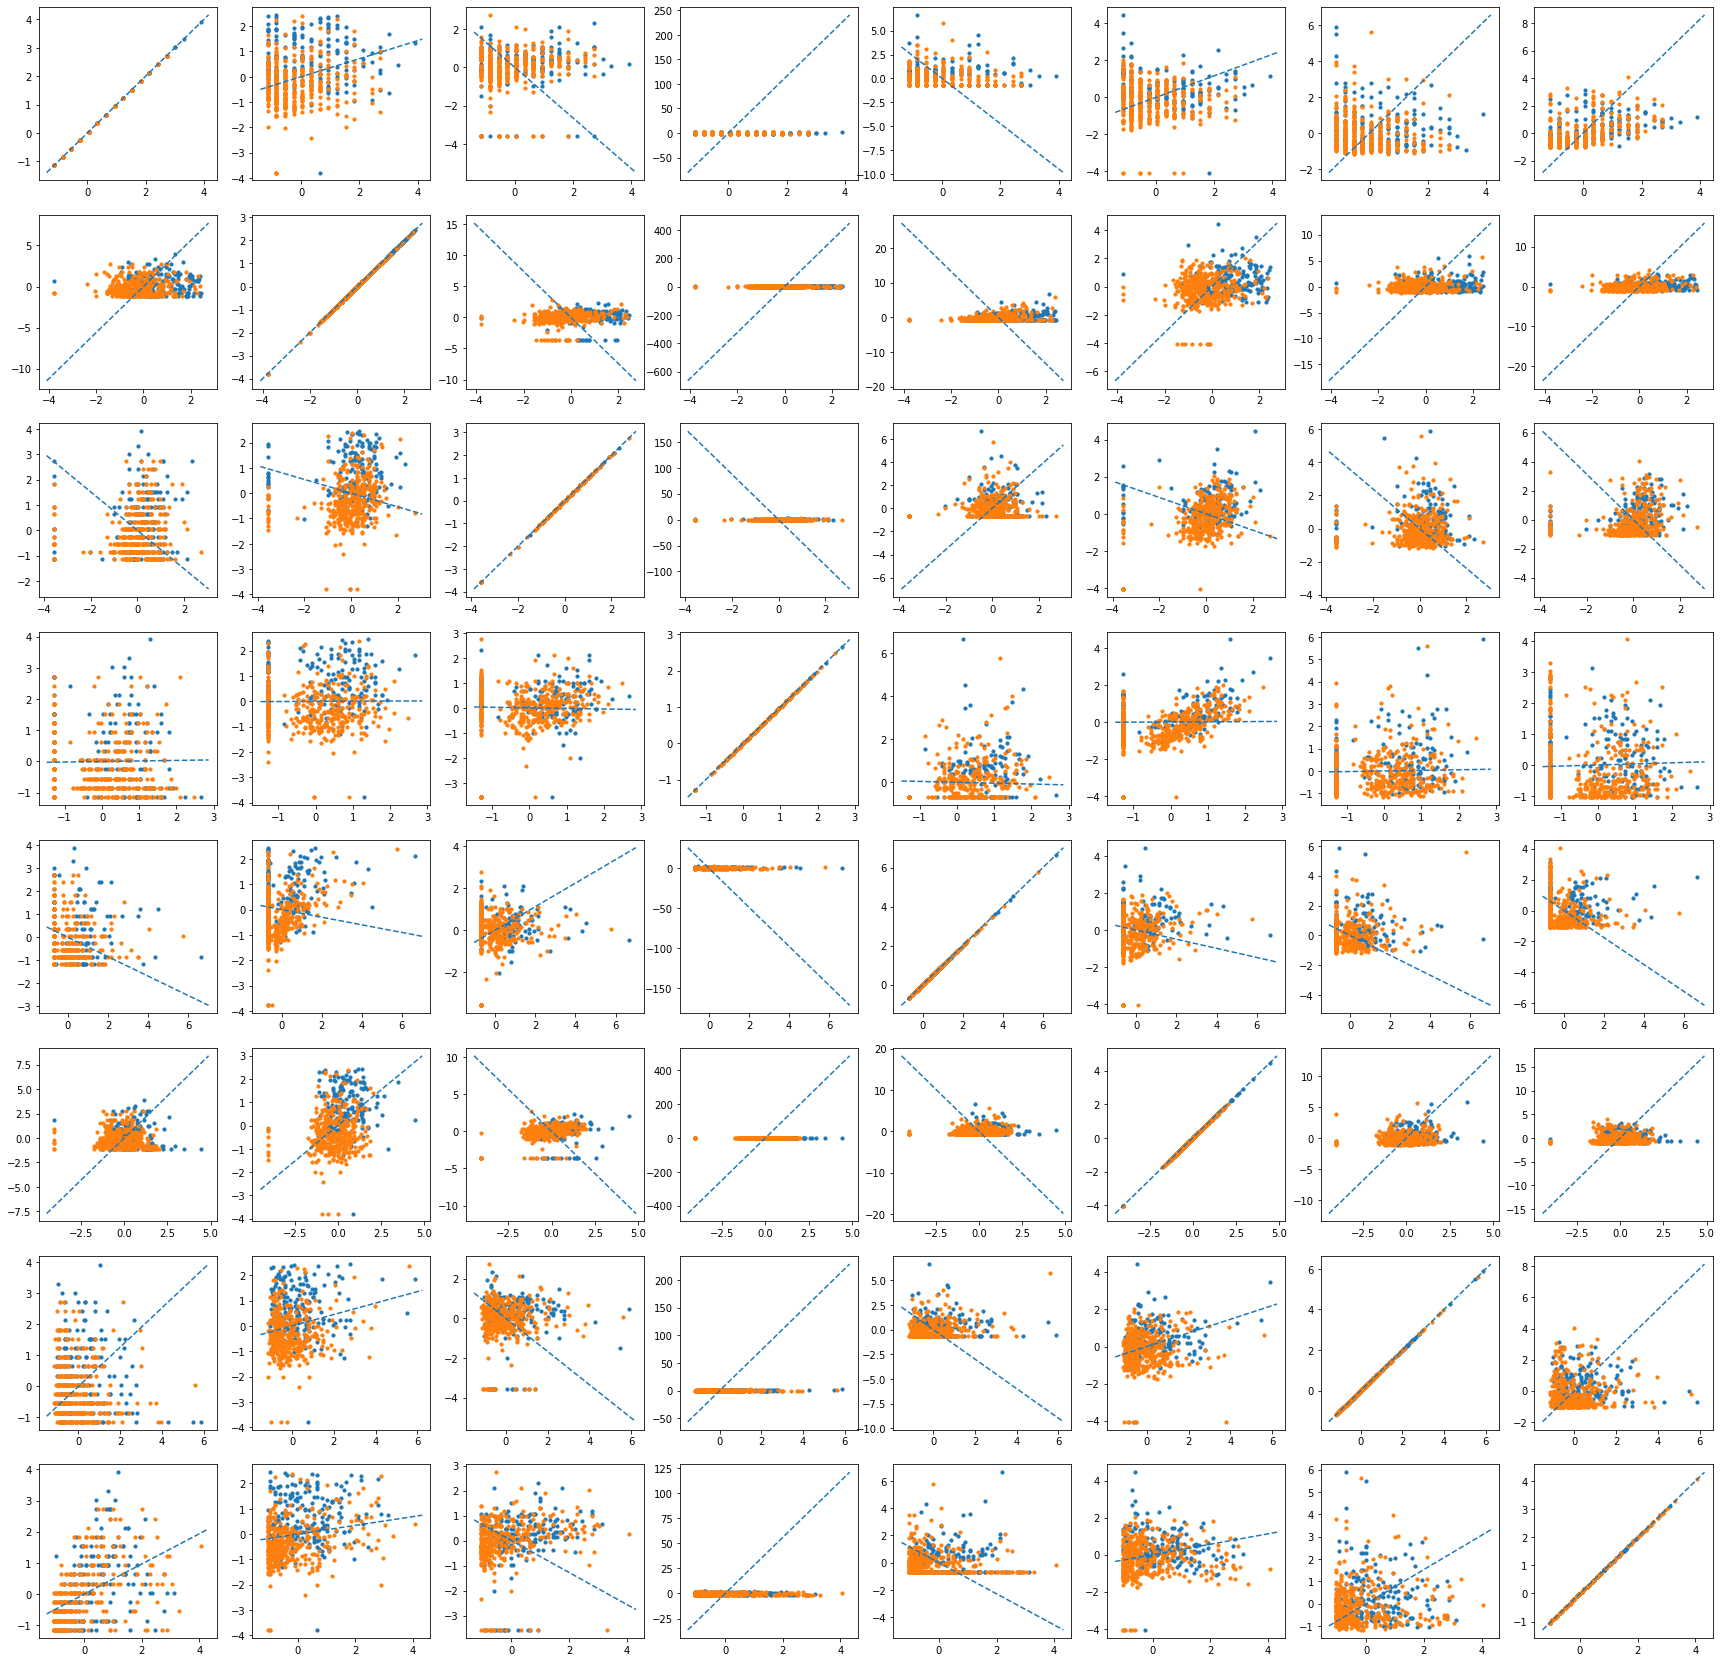

In [49]:
fig = plt.figure(figsize=(30, 30))
W_sklearn = rf_model.coef_
for i in range(8):
    for j in range(8):
        ax = fig.add_subplot(8,8,i*8+j+1)
        templist = np.where(y_train==1)
        ax.scatter(X_train[templist[0],[i]],X_train[templist[0],[j]],s=10)
        templist = np.where(y_train==0)
        ax.scatter(X_train[templist[0],[i]],X_train[templist[0],[j]],s=10)
        ##abline((W_sklearn[0][i]/rf_model.scalings_[i])/(W_sklearn[0][j]/rf_model.scalings_[j]),(0,0))
        abline(W_sklearn[0][i]/W_sklearn[0][j],(0,0))

NameError: name 'W_sklearn' is not defined

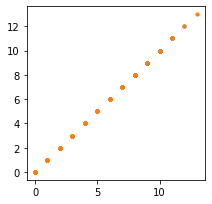

In [13]:
fig = plt.figure(figsize=(30, 30))
for i in range(8):
    for j in range(8):
        ax = fig.add_subplot(8,8,i*8+j+1)
        templist = np.where(y_test==1)
        ax.scatter(X_test[templist[0],[i]],X_test[templist[0],[j]],s=10)
        templist = np.where(y_test==0)
        ax.scatter(X_test[templist[0],[i]],X_test[templist[0],[j]],s=10)
        ##abline((W_sklearn[0][i]/rf_model.scalings_[i])/(W_sklearn[0][j]/rf_model.scalings_[j]),(0,0))
        ##abline(W_sklearn[0][i]/W_sklearn[0][j],(0,0))

In [28]:
## This is Hand-made LDA

X_mean = np.mean(X_train,axis = 0)
X_cov = np.cov(np.transpose(X_train))
templist = np.where(y_train == 0)
X0 = X_train[templist[0],]
templist = np.where(y_train == 1)
X1 = X_train[templist[0],]

X1_mean = np.mean(X1, axis = 0)
X0_mean = np.mean(X0, axis = 0)

In [29]:
## Calculate Weight and Criterion.
W = np.matmul(np.linalg.inv(X_cov),((X1_mean-X0_mean).reshape([-1,1])))
C = np.matmul(W.T, (X1_mean+X0_mean).reshape([-1,1]))/2

In [30]:
## Accuracy of Hand-made LDA
np.sum(np.logical_not(np.logical_xor((np.matmul(X_test, W)>C),y_test.reshape([-1,1]))))/len(y_test)

0.7552083333333334

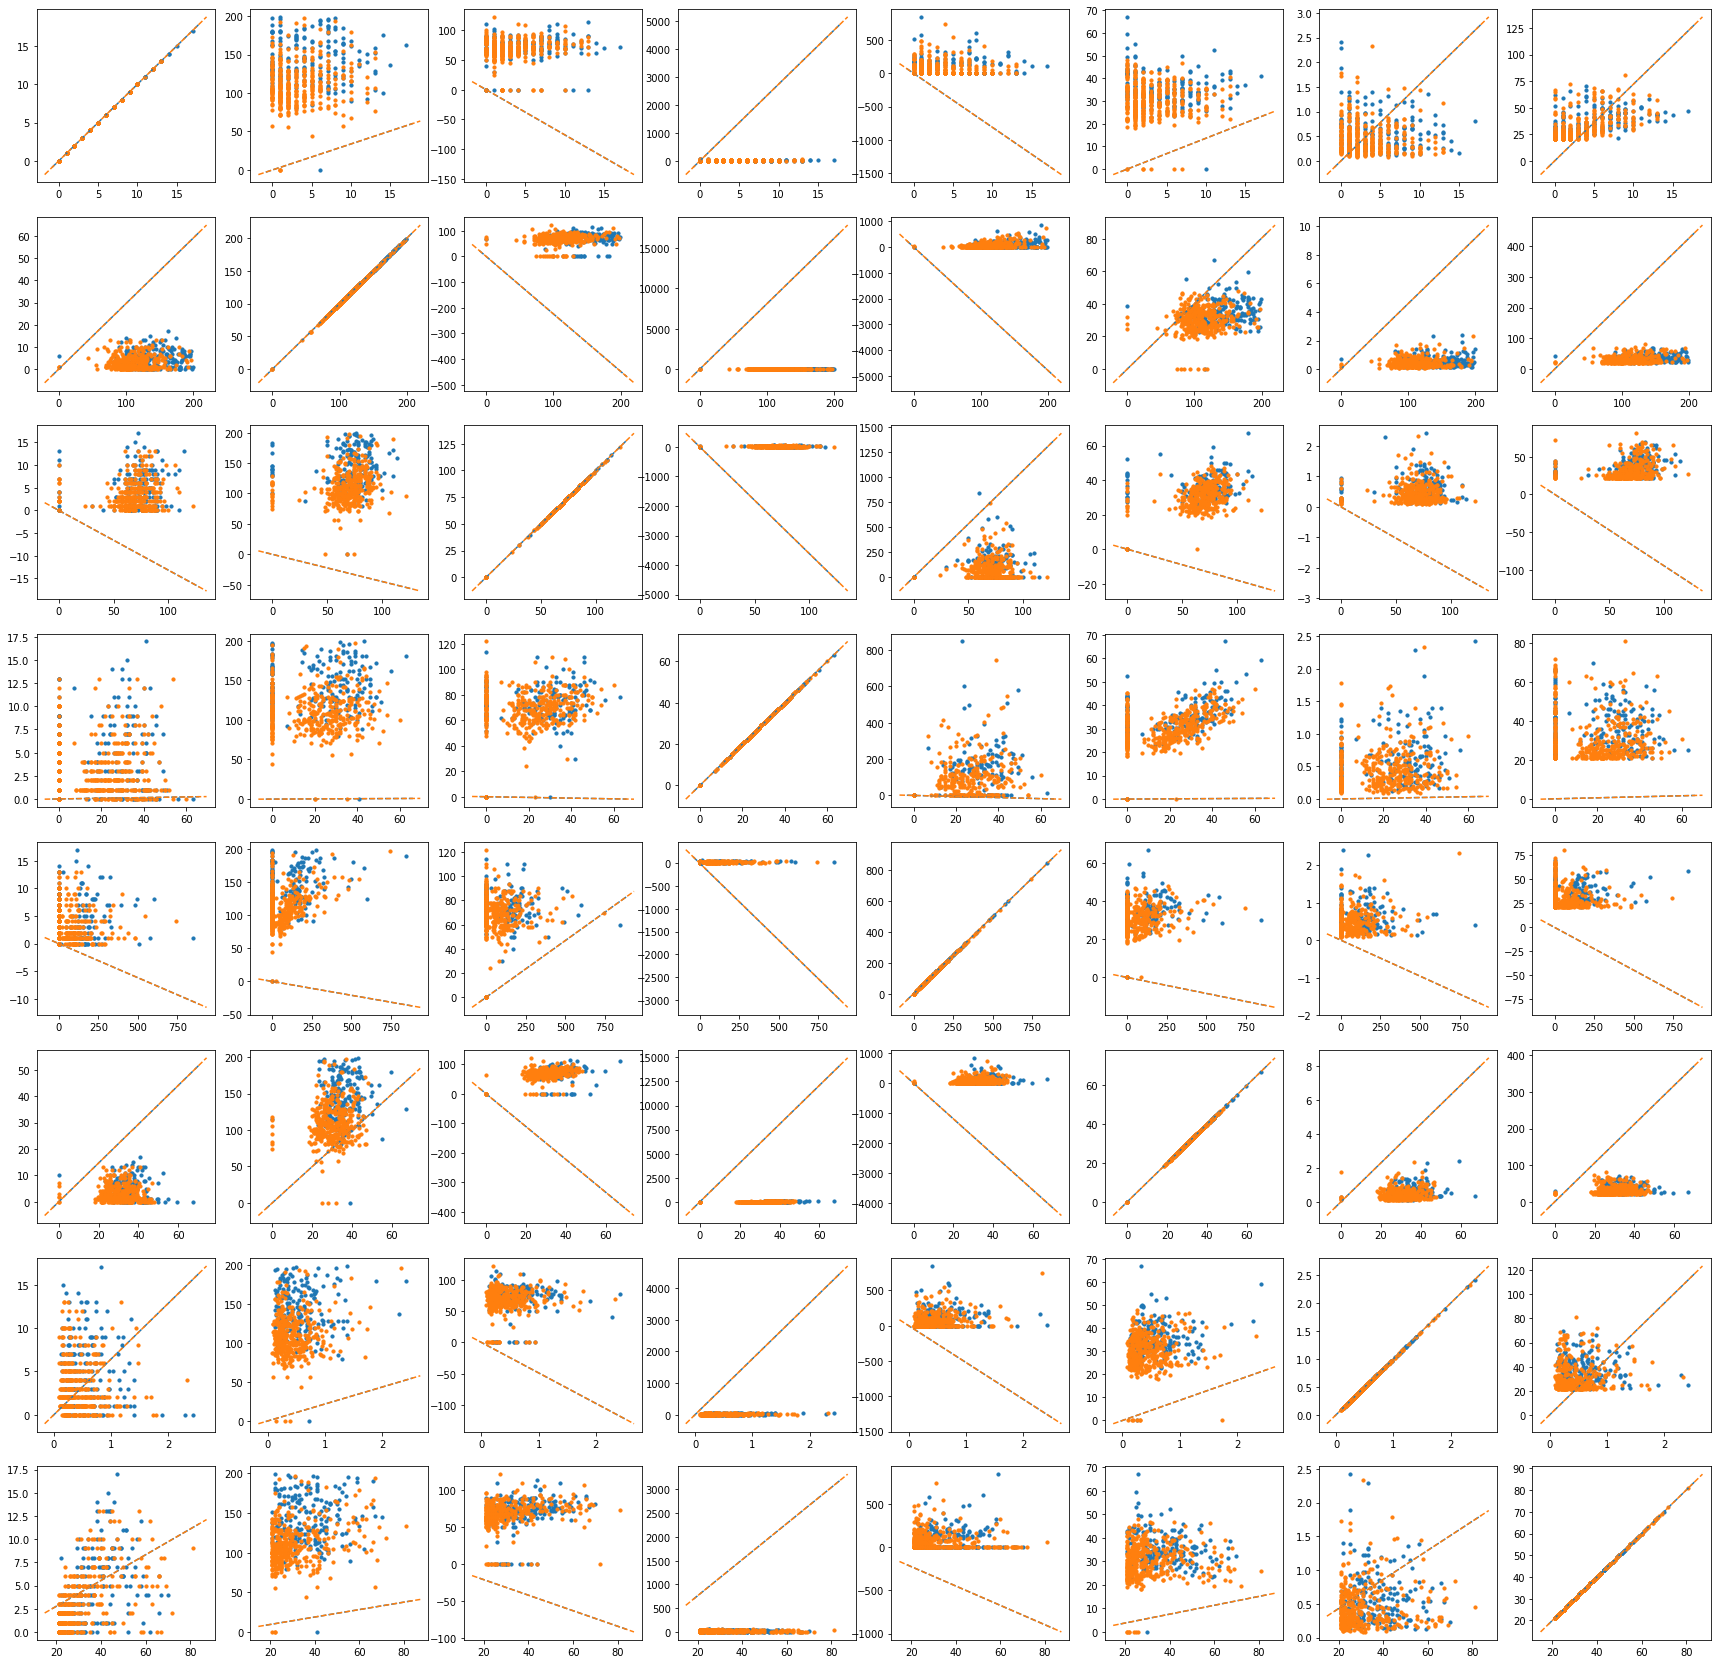

In [31]:
fig = plt.figure(figsize=(30, 30))
for i in range(8):
    for j in range(8):
        ax = fig.add_subplot(8,8,i*8+j+1)
        templist = np.where(y_train==1)
        ax.scatter(X_train[templist[0],[i]],X_train[templist[0],[j]],s=10)
        templist = np.where(y_train==0)
        ax.scatter(X_train[templist[0],[i]],X_train[templist[0],[j]],s=10)
        ##abline((W_sklearn[0][i]/rf_model.scalings_[i])/(W_sklearn[0][j]/rf_model.scalings_[j]),(0,0))
        abline(W[i]/W[j],(0,0))
        abline(W_sklearn[0][i]/W_sklearn[0][j],0)

In [4]:
## Make New Data Set
n = 500
cnt1 = 0
cnt2 = 0
x = np.zeros([2000,3])
y = np.zeros([2000,1])
cnt = 0
while 1:
    xtemp = np.hstack([np.random.uniform(-1,1,[1,2]), np.random.uniform(-1,0,[1,1])])
    if xtemp[0][0]**2+xtemp[0][1]**2<1:
        if cnt1<500:
            cnt1 = cnt1+1
            x[cnt] = xtemp[0]
            y[cnt] = 1
            cnt = cnt+1
    else:
        if cnt2<500:
            cnt2 = cnt2+1
            x[cnt] = xtemp[0]
            y[cnt] = 2
            cnt= cnt+1
    if cnt1>=500 & cnt2>=500:
        break
cnt1 = 0
cnt2 = 0
while 1:
    xtemp = np.hstack([np.random.uniform(-1,1,[1,2]), np.random.uniform(0,1,[1,1])])
    if xtemp[0][0]**2+xtemp[0][1]**2+(xtemp[0][2]-1)**2<1:
        if cnt1<500:
            cnt1 = cnt1+1
            x[cnt] = xtemp[0]
            y[cnt] = 3
            cnt = cnt+1
    else:
        if cnt2<500:
            cnt2 = cnt2+1
            x[cnt] = xtemp[0]
            y[cnt] = 4
            cnt= cnt+1
    if cnt1>=500 & cnt2>=500:
        break

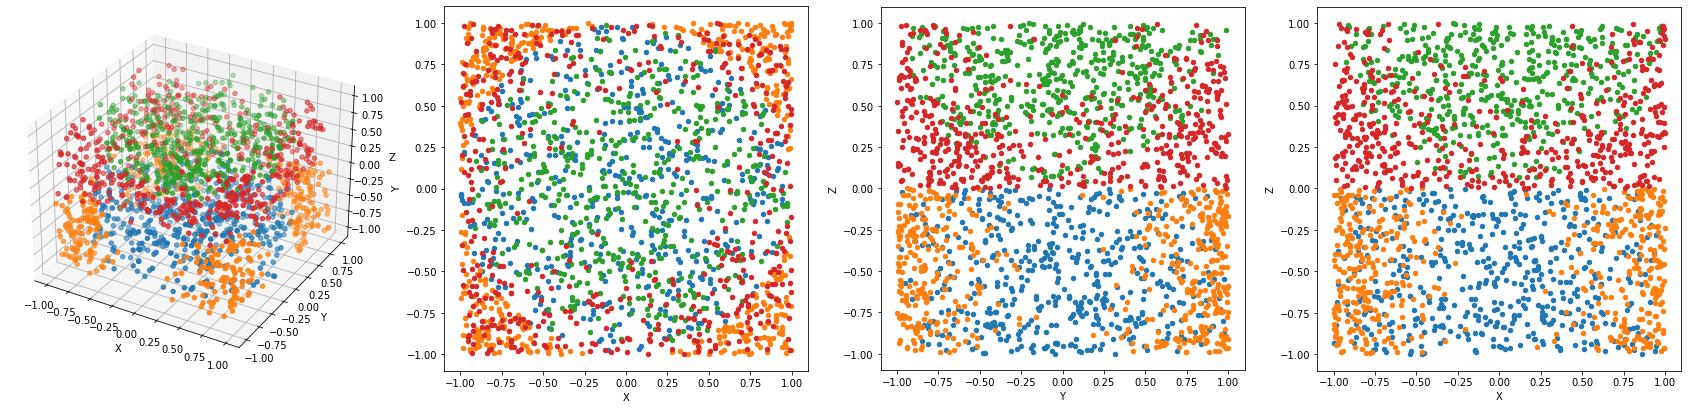

In [5]:
## Plot Dataset
fig = plt.figure(figsize=(30, 8))
ax = fig.add_subplot(1,4,1, projection = '3d')
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(1,4,2)
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal', 'box')

ax = fig.add_subplot(1,4,3)
templist = np.where(y==1)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_aspect('equal', 'box')

ax = fig.add_subplot(1,4,4)
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_aspect('equal', 'box')

In [6]:
## Make New Data Set
n = 500
cnt1 = 0
cnt2 = 0
x = np.zeros([2000,3])
y = np.zeros([2000,1])
cnt = 0
while 1:
    xtemp = np.hstack([np.random.uniform(-1,1,[1,2]), np.random.uniform(-1,1,[1,1])])
    if cnt1<500:
        cnt1 = cnt1+1
        x[cnt] = xtemp[0] + [1,5,-3]
        y[cnt] = 1
        cnt = cnt+1
    elif cnt2<500:
        cnt2 = cnt2+1 
        x[cnt] = xtemp[0] + [-1, 5, -2]
        y[cnt] = 2
        cnt= cnt+1
    if cnt1>=500 & cnt2>=500:
        break
cnt1 = 0
cnt2 = 0
while 1:
    xtemp = np.hstack([np.random.uniform(-1,1,[1,2]), np.random.uniform(-1,1,[1,1])])
    if cnt1<500:
        cnt1 = cnt1+1
        x[cnt] = xtemp[0] + [1, 3, 3]
        y[cnt] = 3
        cnt = cnt+1
    elif cnt2<500:
        cnt2 = cnt2+1
        x[cnt] = xtemp[0] + [1, 5, 3]
        y[cnt] = 4
        cnt= cnt+1
    if cnt1>=500 & cnt2>=500:
        break

In [7]:
## MakeTest Data Set
n = 200
cnt1 = 0
cnt2 = 0
x_test = np.zeros([n*4,3])
y_test = np.zeros([n*4,1])
cnt = 0
while 1:
    xtemp = np.hstack([np.random.uniform(-1,1,[1,2]), np.random.uniform(-1,1,[1,1])])
    if cnt1<n:
        cnt1 = cnt1+1
        x_test[cnt] = xtemp[0] + [1,5,-3]
        y_test[cnt] = 1
        cnt = cnt+1
    elif cnt2<n:
        cnt2 = cnt2+1 
        x_test[cnt] = xtemp[0] + [-1, 5, -2]
        y_test[cnt] = 2
        cnt= cnt+1
    if cnt1>=n & cnt2>=n:
        break
cnt1 = 0
cnt2 = 0
while 1:
    xtemp = np.hstack([np.random.uniform(-1,1,[1,2]), np.random.uniform(-1,1,[1,1])])
    if cnt1<n:
        cnt1 = cnt1+1
        x_test[cnt] = xtemp[0] + [1, 3, 3]
        y_test[cnt] = 3
        cnt = cnt+1
    elif cnt2<n:
        cnt2 = cnt2+1
        x_test[cnt] = xtemp[0] + [1, 5, 3]
        y_test[cnt] = 4
        cnt= cnt+1
    if cnt1>=n & cnt2>=n:
        break

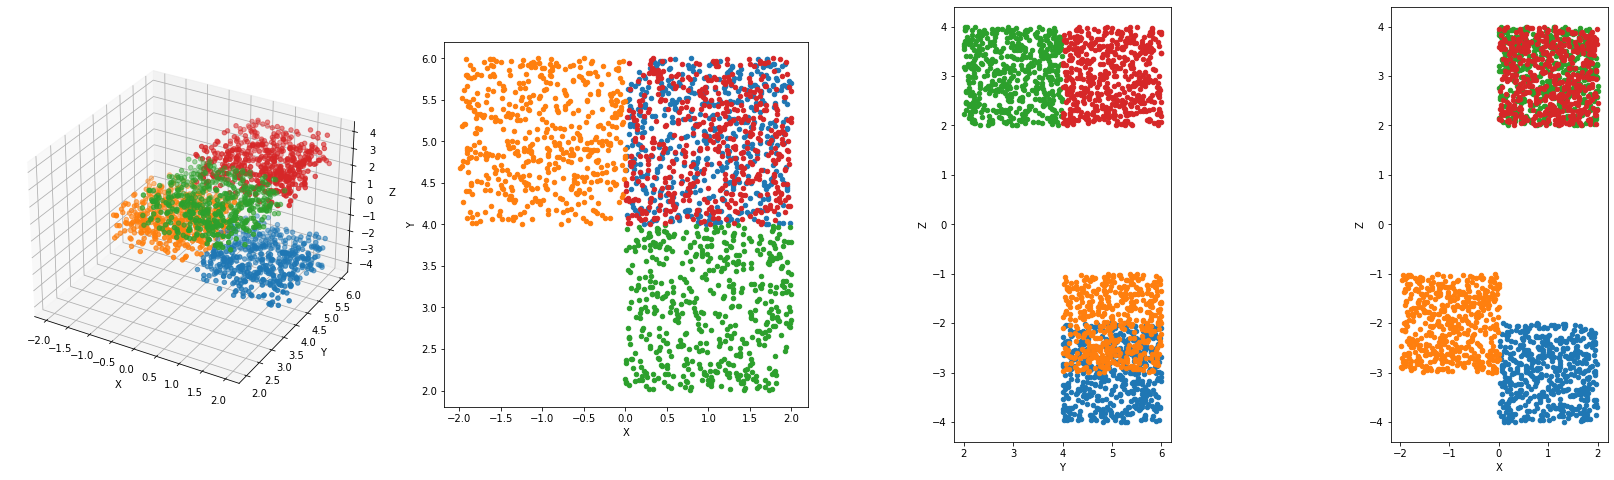

In [8]:
## Plot Dataset
fig = plt.figure(figsize=(30, 8))
ax = fig.add_subplot(1,4,1, projection = '3d')
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(1,4,2)
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal', 'box')

ax = fig.add_subplot(1,4,3)
templist = np.where(y==1)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_aspect('equal', 'box')

ax = fig.add_subplot(1,4,4)
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_aspect('equal', 'box')

In [9]:
## Randomize inputs
index = np.random.permutation(2000)
x = x[index]
y = y[index]

In [10]:
index = np.random.permutation(800)
x_test = x_test[index]
y_test = y_test[index]

In [37]:
## Multiclass LDA
sigma = np.cov(np.transpose(x))
mu1 = np.mean(x[np.where(y==1)[0]],axis=0).reshape([-1, 1])
mu2 = np.mean(x[np.where(y==2)[0]],axis=0).reshape([-1, 1])
mu3 = np.mean(x[np.where(y==3)[0]],axis=0).reshape([-1, 1])
mu4 = np.mean(x[np.where(y==4)[0]],axis=0).reshape([-1, 1])
mu = (mu1+mu2+mu3+mu4) / 4
sigmab = (np.matmul((mu1-mu), np.transpose(mu1-mu))+np.matmul((mu2-mu), np.transpose(mu2-mu))+np.matmul((mu3-mu), np.transpose(mu3-mu))+np.matmul((mu4-mu), np.transpose(mu4-mu))) /4

In [38]:
weight = np.linalg.eig( np.matmul(np.linalg.inv(sigma), sigmab))[1]
featurespace = np.matmul(x_test, weight.T)

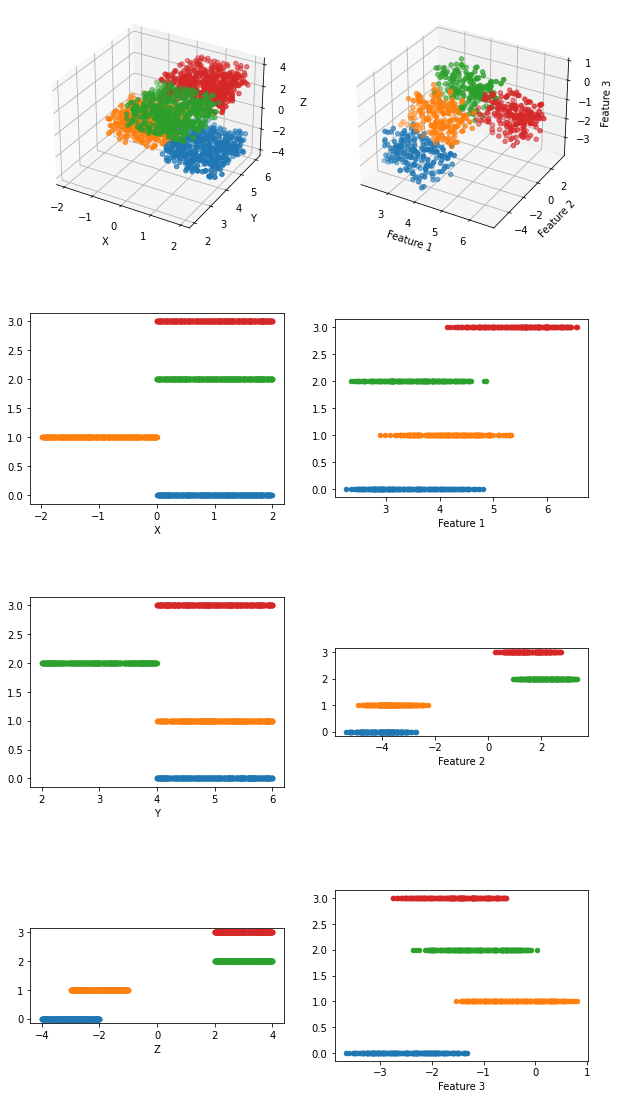

In [39]:
## Plot Dataset
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(4,2,2, projection = '3d')
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax = fig.add_subplot(4,2,4)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[0]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 1')
ax.set_aspect('equal')

ax = fig.add_subplot(4,2,6)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[1]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 2')
ax.set_aspect('equal')

ax = fig.add_subplot(4,2,8)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[2]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 3')
ax.set_aspect('equal')

ax = fig.add_subplot(4,2,1, projection = '3d')
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(4,2,3)
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]], np.ones([500,1])*3,s=20)
ax.set_xlabel('X')
ax.set_aspect('equal')

ax = fig.add_subplot(4,2,5)
templist = np.where(y==1)
ax.scatter(x[templist[0],[1]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[1]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[1]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[1]], np.ones([500,1])*3,s=20)
ax.set_xlabel('Y')
ax.set_aspect('equal')

ax = fig.add_subplot(4,2,7)
templist = np.where(y==1)
ax.scatter(x[templist[0],[2]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[2]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[2]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[2]], np.ones([500,1])*3,s=20)
ax.set_xlabel('Z')
ax.set_aspect('equal')

In [45]:
np.mean(x[np.where(y_test==1)[0]],axis=0).reshape([-1, 1])

array([[0.53951777],
       [4.57398193],
       [0.24310469]])

In [46]:
## Multiclass LDA(one versus rest)
sigma = np.cov(np.transpose(x))
weight = np.zeros([3,4])
threshold = np.zeros(4)
for i in range(4):
    mu_target = np.mean(x[np.where(y_test==i+1)[0]],axis=0).reshape([-1, 1])
    mu_rest_idx = np.ndarray([1,0])[0]
    for j in np.setdiff1d(range(4), i):
        mu_rest_idx = np.concatenate([mu_rest_idx, np.where(y==(j+1))[0]])
    mu_rest_idx = [ int(x) for x in mu_rest_idx ]
    mu_rest = np.mean(x[mu_rest_idx], axis=0).reshape([-1,1])
    
    weight[:,i] = np.matmul(np.linalg.inv(sigma), mu_target-mu_rest).reshape([1,-1])
    threshold[i] = np.matmul(weight[:,i].reshape([1,-1]), (mu_target+mu_rest)/2)

featurespace = np.matmul(x_test, weight)
accuracy = sum((np.argmax(featurespace -threshold,axis=1)+1)==y_test.reshape([1,-1])[0])/len(y_test)

(-4.399363245499621, 4.398155667262906)

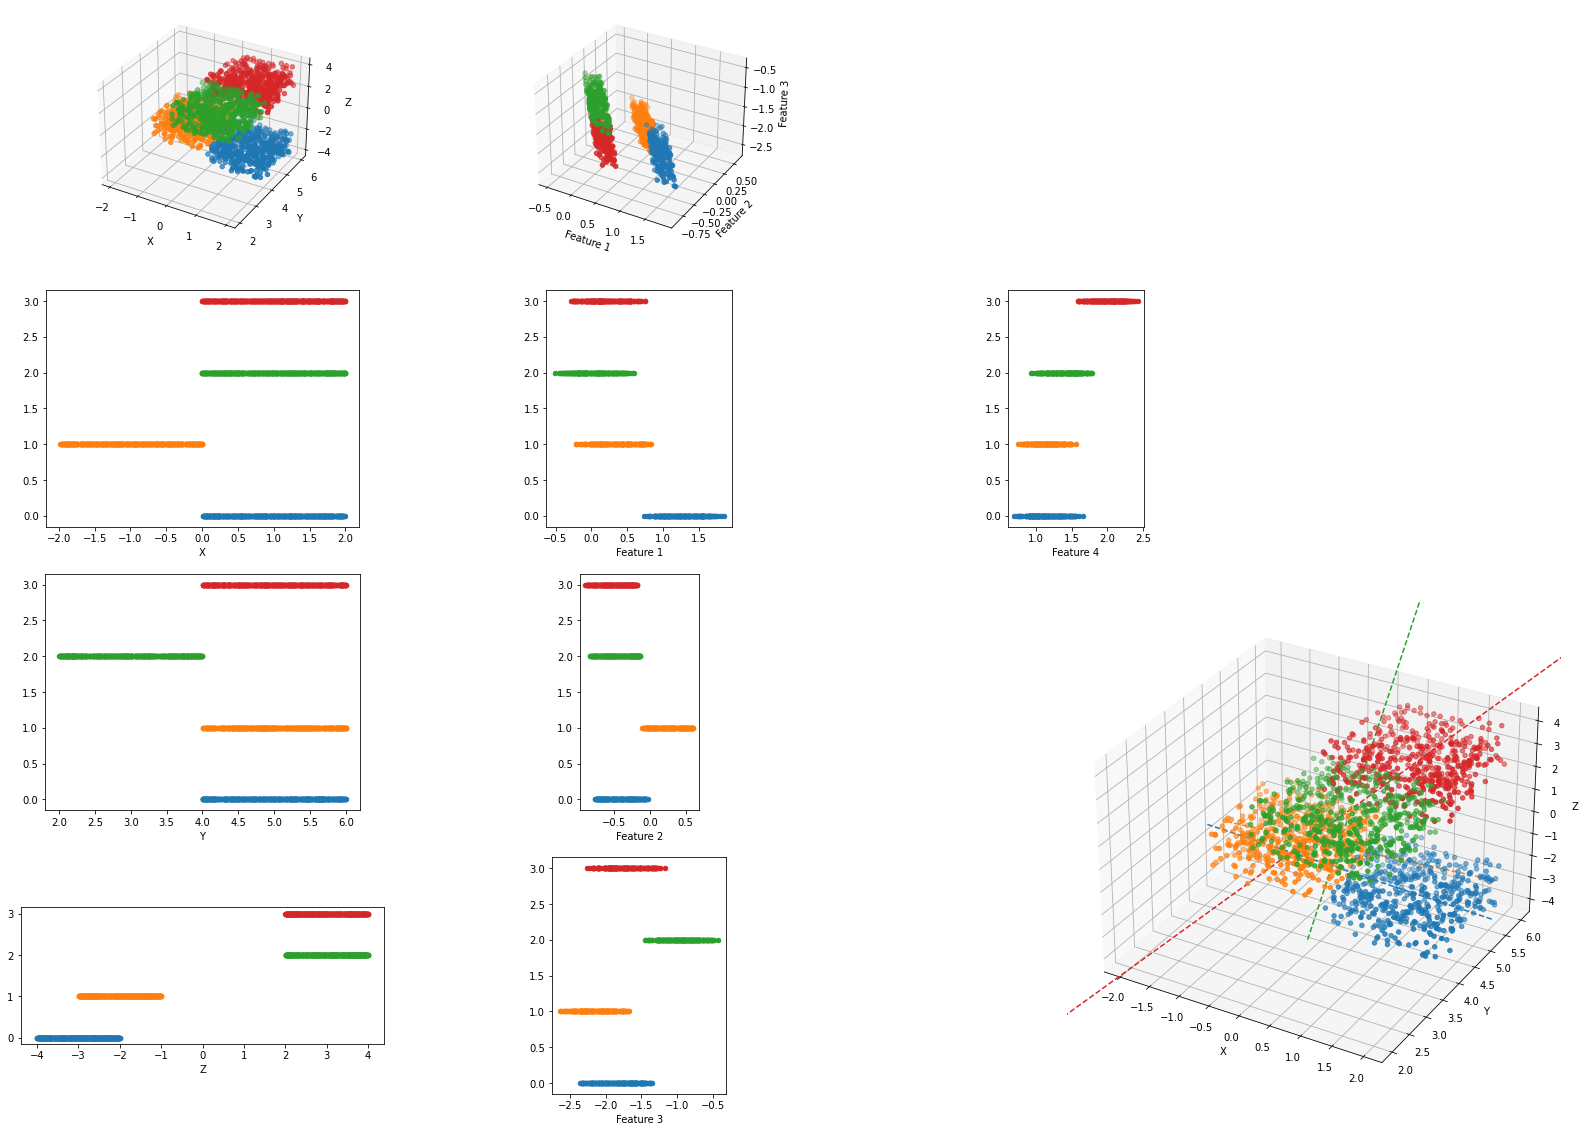

In [49]:
## Plot Dataset
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(4,4,2, projection = '3d')
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax = fig.add_subplot(4,4,6)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[0]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 1')
ax.set_aspect('equal')

ax = fig.add_subplot(4,4,10)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[1]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 2')
ax.set_aspect('equal')

ax = fig.add_subplot(4,4,14)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[2]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 3')
ax.set_aspect('equal')

ax = fig.add_subplot(4,4,7)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[3]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[3]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[3]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[3]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 4')
ax.set_aspect('equal')

ax = fig.add_subplot(4,4,1, projection = '3d')
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(4,4,5)
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]], np.ones([500,1])*3,s=20)
ax.set_xlabel('X')
ax.set_aspect('equal')

ax = fig.add_subplot(4,4,9)
templist = np.where(y==1)
ax.scatter(x[templist[0],[1]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[1]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[1]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[1]], np.ones([500,1])*3,s=20)
ax.set_xlabel('Y')
ax.set_aspect('equal')

ax = fig.add_subplot(4,4,13)
templist = np.where(y==1)
ax.scatter(x[templist[0],[2]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[2]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[2]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[2]], np.ones([500,1])*3,s=20)
ax.set_xlabel('Z')
ax.set_aspect('equal')

ax = fig.add_subplot(2,2,4, projection = '3d')
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

xlimit = ax.get_xlim()
ylimit = ax.get_ylim()
zlimit = ax.get_zlim()
x_vals = np.array(ax.get_xlim())
for i in range(4):
    y_vals = (x_vals-np.mean(x[np.where(y==(i+1))[0]],axis=0).reshape([-1, 1])[0])*weight[1,i]/weight[0,i] + np.mean(x[np.where(y==(i+1))[0]],axis=0).reshape([-1, 1])[1]
    z_vals = (x_vals-np.mean(x[np.where(y==(i+1))[0]],axis=0).reshape([-1, 1])[0])*weight[2,i]/weight[0,i] + np.mean(x[np.where(y==(i+1))[0]],axis=0).reshape([-1, 1])[2]
    ax.plot(x_vals, y_vals,z_vals, '--')
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.set_zlim(zlimit)

In [48]:
weight

array([[ 0.37771223, -0.34074306,  0.14590749,  0.07447742],
       [ 0.07201174, -0.02548221, -0.38906615,  0.30219499],
       [-0.1759705 , -0.02135293,  0.02733597,  0.13599326]])

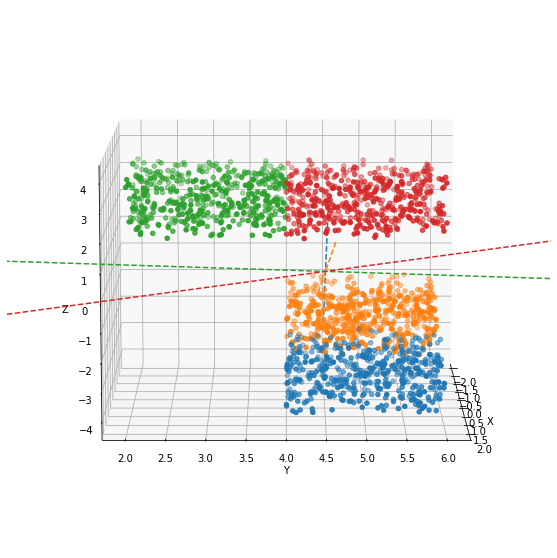

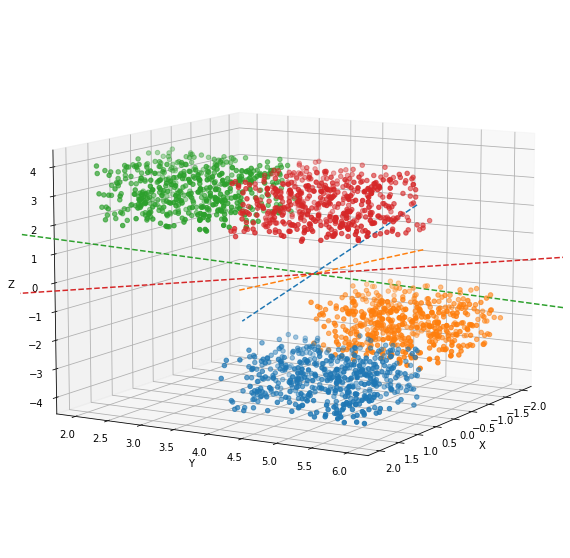

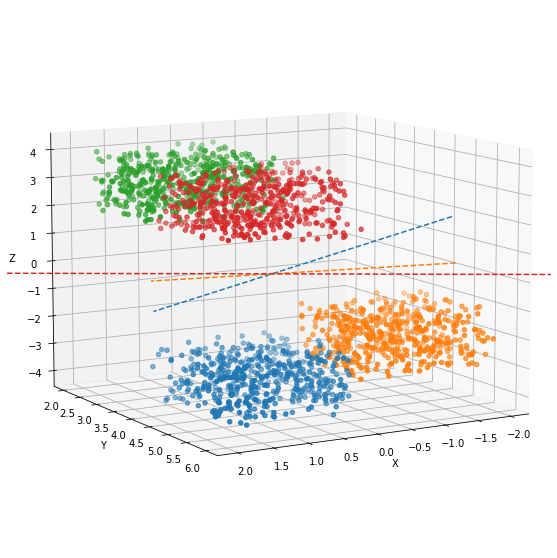

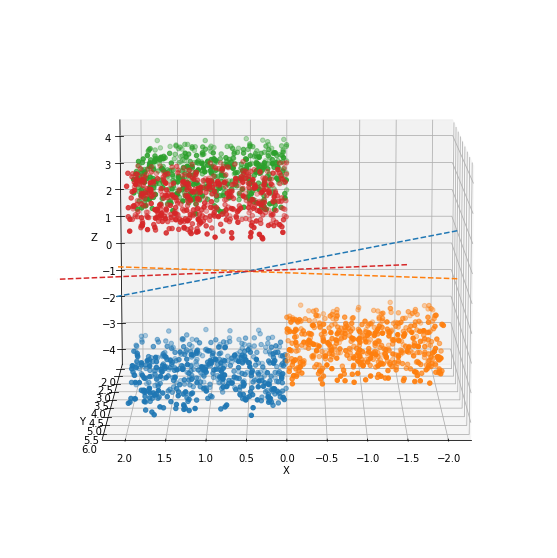

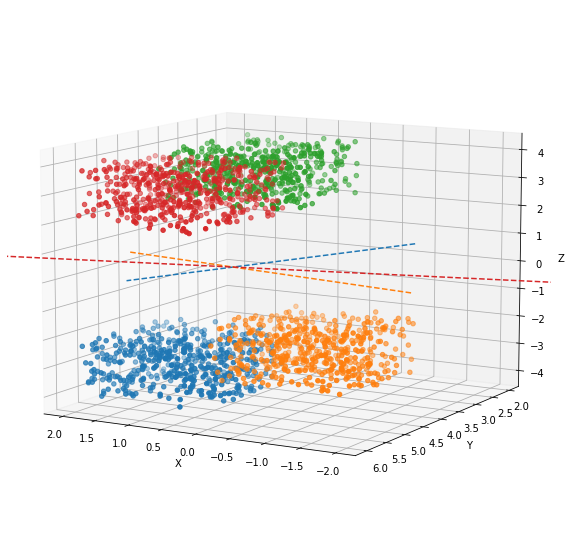

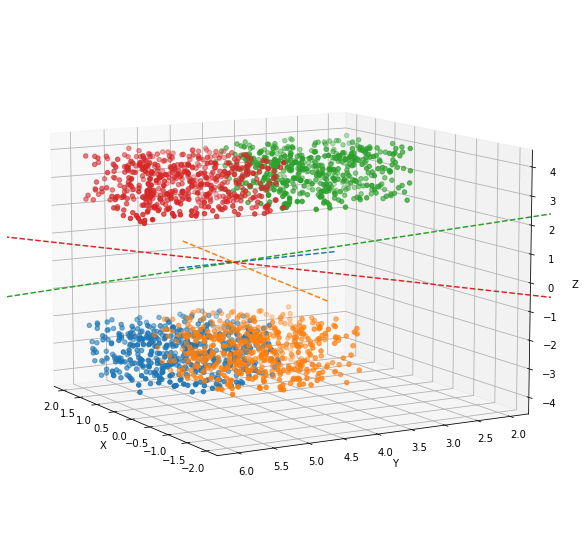

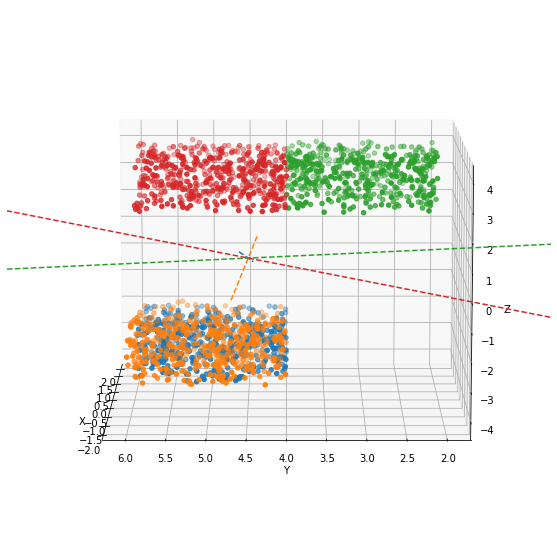

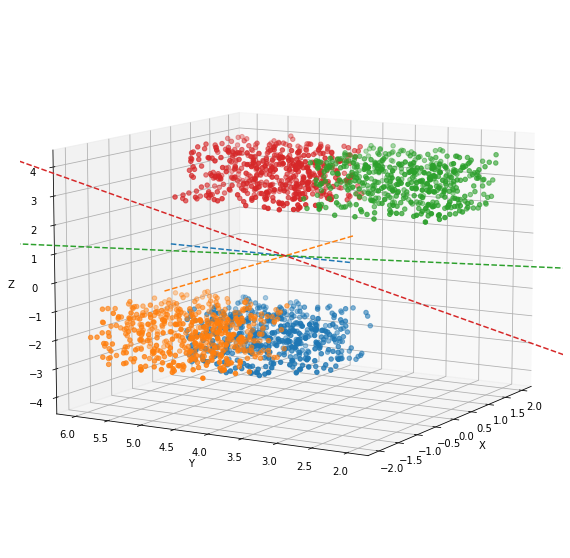

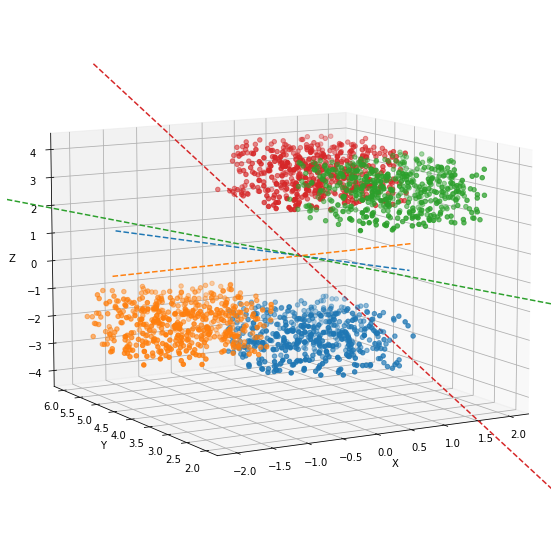

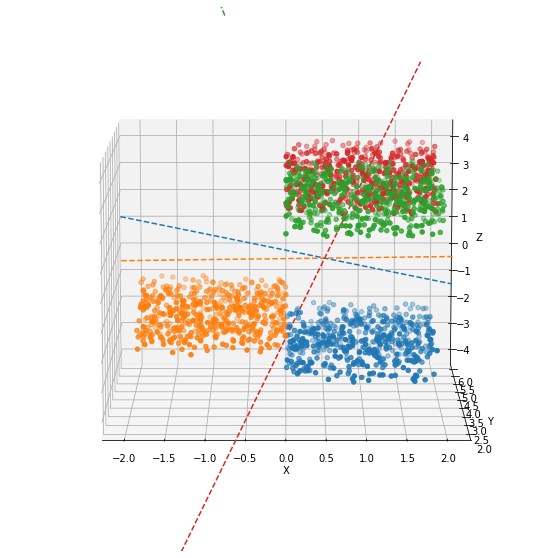

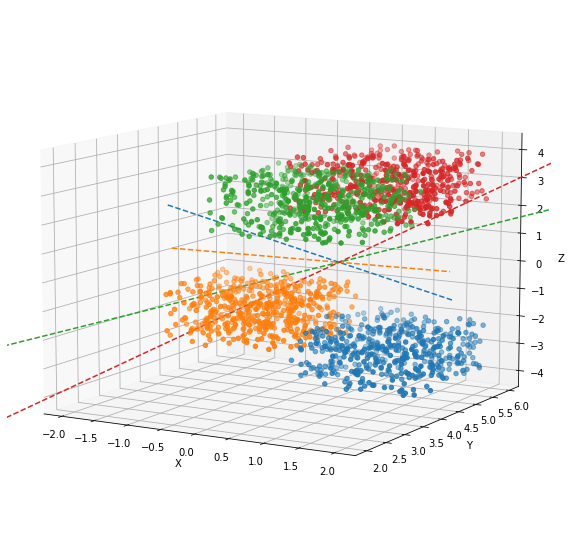

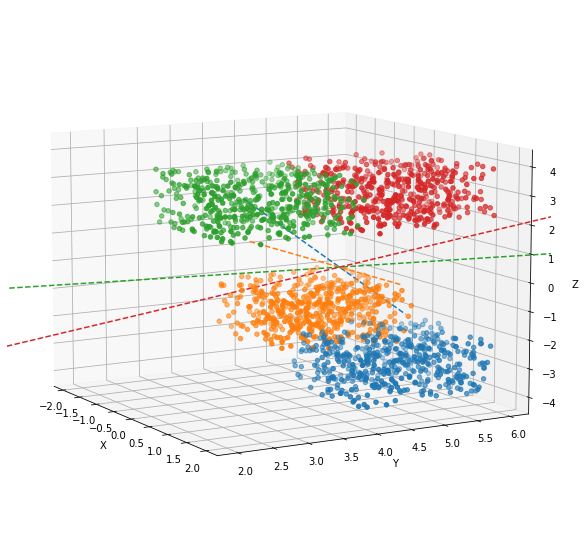

In [33]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
def draw_my_figure(angle): 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1, projection = '3d')
    templist = np.where(y==1)
    ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
    templist = np.where(y==2)
    ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
    templist = np.where(y==3)
    ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
    templist = np.where(y==4)
    ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    xlimit = ax.get_xlim()
    ylimit = ax.get_ylim()
    zlimit = ax.get_zlim()
    x_vals = np.array(ax.get_xlim())
    for i in range(4):
        y_vals = (x_vals-np.mean(x,axis=0).reshape([-1, 1])[0])*weight[1,i]/weight[0,i] + np.mean(x,axis=0).reshape([-1, 1])[1]
        z_vals = (x_vals-np.mean(x,axis=0).reshape([-1, 1])[0])*weight[2,i]/weight[0,i] + np.mean(x,axis=0).reshape([-1, 1])[2]
        ax.plot(x_vals, y_vals,z_vals, '--')
    ax.set_xlim(xlimit)
    ax.set_ylim(ylimit)
    ax.set_zlim(zlimit)
    ax.view_init(10,angle)

for angle in range(0, 360, 30):
    draw_my_figure(angle)

In [50]:
### BEGIN SOLUTION
## Train the RF Model with a Linear Discriminant Analysis
rf_model = LinearDiscriminantAnalysis()
rf_model.fit(x,y)
rf_model.predict(x_test).reshape([-1,1])==y_test
weight2 = rf_model.coef_

False

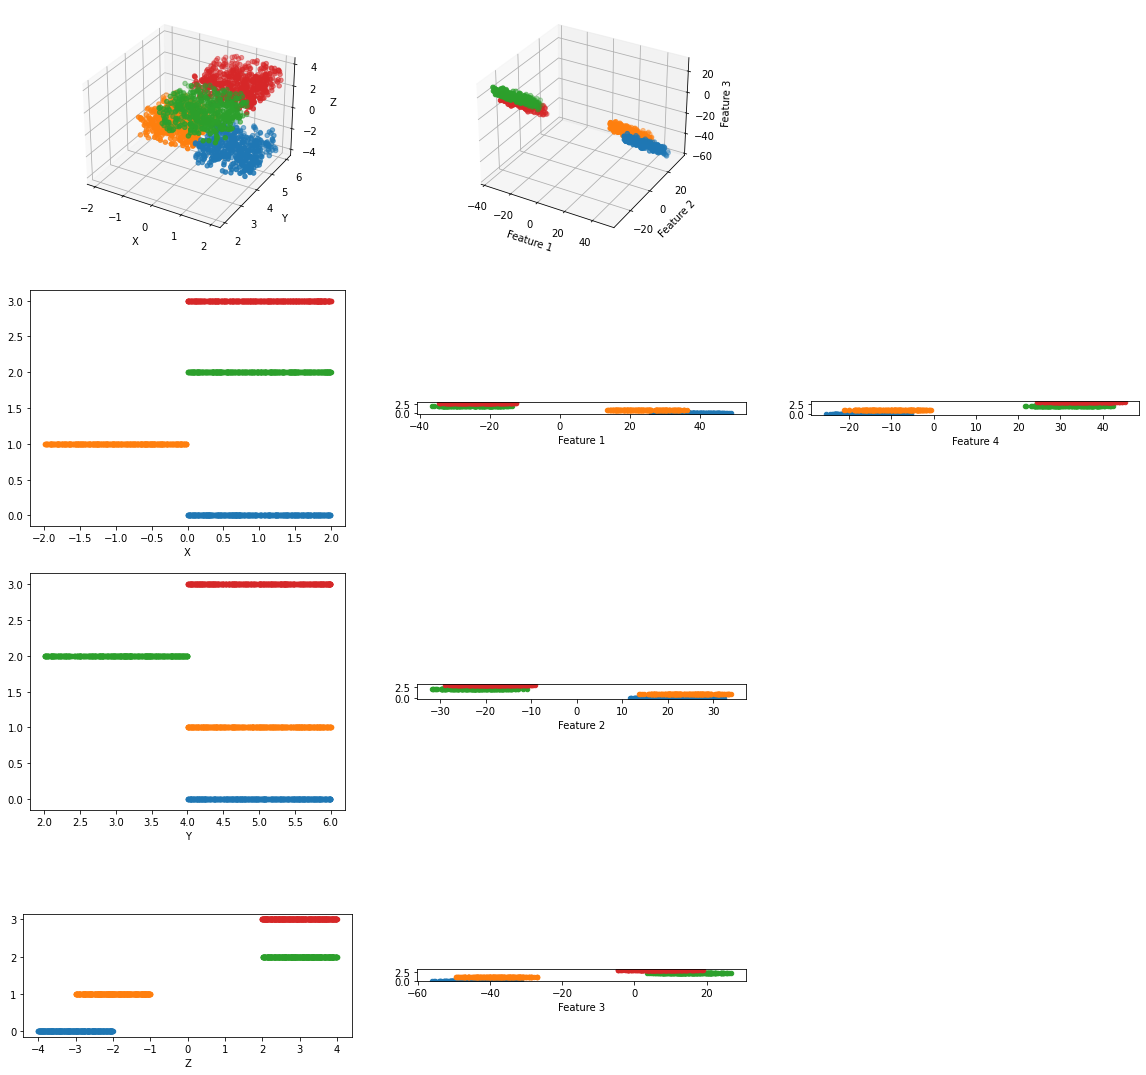

In [49]:
featurespace = np.matmul(x_test, weight2.T)
## Plot Dataset
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(4,3,2, projection = '3d')
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[0]],featurespace[templist[0],[1]],featurespace[templist[0],[2]],s=20)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax = fig.add_subplot(4,3,5)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[0]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[0]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 1')
ax.set_aspect('equal')

ax = fig.add_subplot(4,3,8)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[1]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[1]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 2')
ax.set_aspect('equal')

ax = fig.add_subplot(4,3,11)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[2]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[2]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 3')
ax.set_aspect('equal')

ax = fig.add_subplot(4,3,6)
templist = np.where(y_test==1)
ax.scatter(featurespace[templist[0],[3]], np.zeros([200,1]),s=20)
templist = np.where(y_test==2)
ax.scatter(featurespace[templist[0],[3]], np.ones([200,1]),s=20)
templist = np.where(y_test==3)
ax.scatter(featurespace[templist[0],[3]], np.ones([200,1])*2,s=20)
templist = np.where(y_test==4)
ax.scatter(featurespace[templist[0],[3]], np.ones([200,1])*3,s=20)
ax.set_xlabel('Feature 4')
ax.set_aspect('equal')

ax = fig.add_subplot(4,3,1, projection = '3d')
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]],x[templist[0],[1]],x[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(4,3,4)
templist = np.where(y==1)
ax.scatter(x[templist[0],[0]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[0]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[0]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[0]], np.ones([500,1])*3,s=20)
ax.set_xlabel('X')
ax.set_aspect('equal')

ax = fig.add_subplot(4,3,7)
templist = np.where(y==1)
ax.scatter(x[templist[0],[1]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[1]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[1]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[1]], np.ones([500,1])*3,s=20)
ax.set_xlabel('Y')
ax.set_aspect('equal')

ax = fig.add_subplot(4,3,10)
templist = np.where(y==1)
ax.scatter(x[templist[0],[2]], np.zeros([500,1]),s=20)
templist = np.where(y==2)
ax.scatter(x[templist[0],[2]], np.ones([500,1]),s=20)
templist = np.where(y==3)
ax.scatter(x[templist[0],[2]], np.ones([500,1])*2,s=20)
templist = np.where(y==4)
ax.scatter(x[templist[0],[2]], np.ones([500,1])*3,s=20)
ax.set_xlabel('Z')
ax.set_aspect('equal')

In [50]:
rf_model.predict(x_test)

array([2., 1., 1., 2., 4., 4., 4., 3., 2., 1., 3., 2., 4., 1., 2., 2., 4.,
       1., 1., 2., 2., 3., 2., 2., 3., 4., 3., 3., 3., 4., 2., 4., 4., 2.,
       3., 3., 2., 4., 4., 2., 2., 1., 4., 3., 4., 1., 3., 4., 4., 3., 4.,
       1., 4., 3., 2., 3., 1., 4., 3., 3., 1., 1., 4., 4., 2., 4., 1., 1.,
       3., 1., 3., 2., 4., 4., 2., 3., 1., 2., 3., 4., 1., 1., 1., 3., 1.,
       2., 4., 3., 2., 2., 4., 4., 1., 1., 3., 4., 1., 1., 1., 2., 2., 2.,
       1., 2., 2., 1., 3., 1., 1., 3., 1., 2., 2., 4., 4., 3., 2., 3., 2.,
       2., 4., 2., 1., 3., 2., 1., 2., 4., 2., 4., 4., 2., 1., 1., 1., 4.,
       1., 2., 1., 1., 1., 1., 4., 4., 2., 1., 1., 2., 1., 2., 2., 3., 1.,
       1., 1., 4., 1., 3., 1., 2., 2., 1., 1., 1., 4., 1., 1., 2., 1., 4.,
       2., 3., 3., 2., 4., 4., 2., 3., 3., 4., 2., 4., 4., 4., 3., 2., 4.,
       3., 3., 2., 1., 4., 3., 1., 2., 3., 2., 2., 1., 1., 2., 2., 3., 1.,
       2., 3., 3., 3., 2., 1., 4., 1., 4., 4., 4., 3., 4., 3., 4., 2., 3.,
       2., 4., 1., 3., 1.

In [51]:
rf_model.intercept_
rf_model.coef_

array([[  1.15677876,   1.14245205, -10.05993268],
       [ -4.45270348,   1.16540886,  -6.88694297],
       [  1.56850934,  -3.95621976,   8.48221179],
       [  1.72741538,   1.64835885,   8.46466386]])

Text(0.5, 0, 'Z')

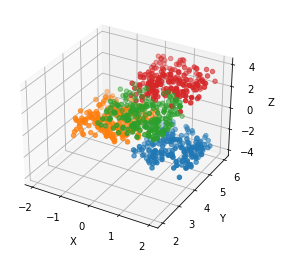

In [52]:
## Plot Dataset
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(4,2,1, projection = '3d')

#xx, yy = np.meshgrid(range(10), range(10))
#z = (9 - xx - yy) / 2 

#plt3d.plot_surface(xx, yy, z, alpha=0.2)

# Ensure that the next plot doesn't overwrite the first plot
#ax = plt.gca()
#ax.hold(True)
#ax.scatter(points2[0], point2[1], point2[2], color='green')

templist = np.where(y_test==1)
ax.scatter(x_test[templist[0],[0]],x_test[templist[0],[1]],x_test[templist[0],[2]],s=20)
templist = np.where(y_test==2)
ax.scatter(x_test[templist[0],[0]],x_test[templist[0],[1]],x_test[templist[0],[2]],s=20)
templist = np.where(y_test==3)
ax.scatter(x_test[templist[0],[0]],x_test[templist[0],[1]],x_test[templist[0],[2]],s=20)
templist = np.where(y_test==4)
ax.scatter(x_test[templist[0],[0]],x_test[templist[0],[1]],x_test[templist[0],[2]],s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')